In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
df= pd.read_csv('CarPrice_dataset.csv')

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Index([0, 1, 2, 3, -1, -2], dtype='int64', name='symboling') [67, 54, 32, 27, 22, 3]


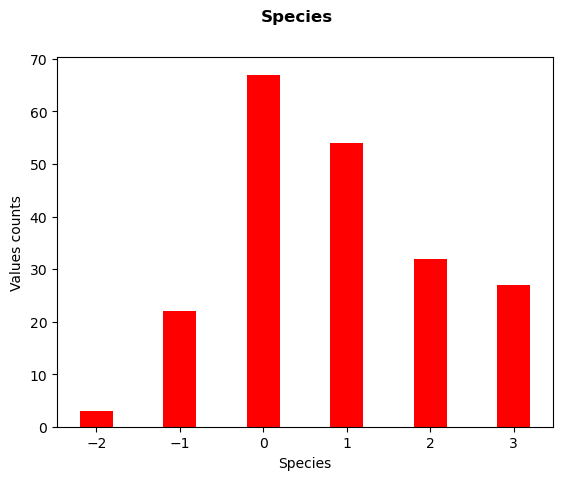

In [9]:
x=df['symboling'].value_counts().index
y=df['symboling'].value_counts().values.tolist()
print(x,y)
plt.bar(x,y,color='red',width=0.4)
plt.ylabel('Values counts')
plt.xlabel('Species')
plt.suptitle('Species',weight='bold')
plt.show()

([<matplotlib.patches.Wedge at 0x2083fc05c10>,
 [Text(-0.20943022501311478, 1.0798791510400394, 'four'),
  Text(0.20943022501311442, -1.0798791510400396, 'two')],
 [Text(-0.11423466818897168, 0.5890249914763851, '56.1%'),
  Text(0.11423466818897149, -0.5890249914763851, '43.9%')])

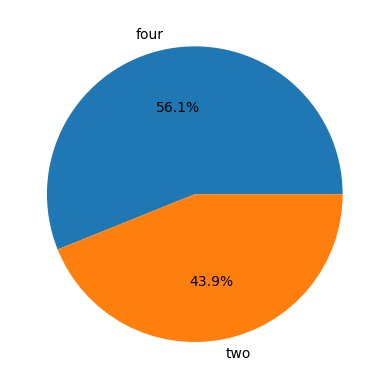

In [10]:
y=df['doornumber'].value_counts().values.tolist()
mylabels=df['doornumber'].value_counts().index
plt.pie(y,labels=mylabels,autopct='%1.1f%%')

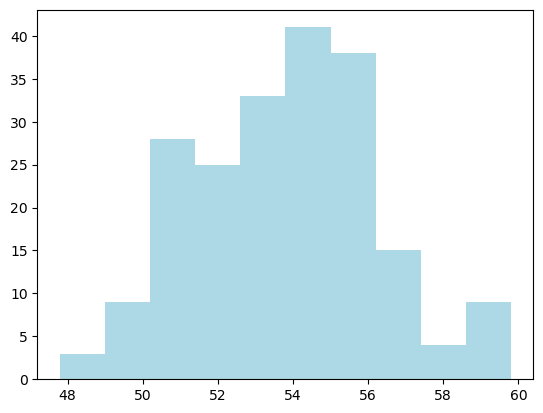

In [11]:
x=df['carheight']
plt.hist(x,bins=10,color='lightblue')
plt.show()

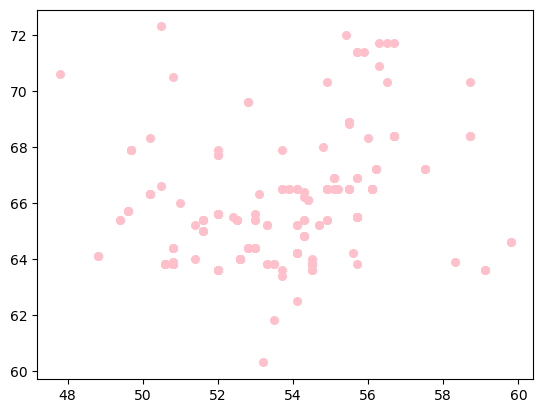

In [12]:
x=df['carheight']
y=df['carwidth']
plt.scatter(x,y,c='pink',marker='o',s=30)
plt.show()

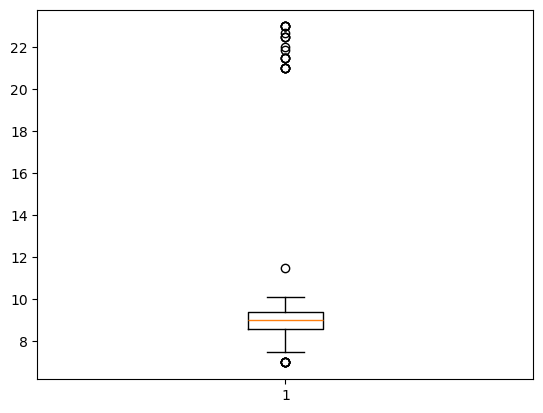

In [13]:
plt.boxplot(df['compressionratio'])
plt.show()

C:\Users\Omkar\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Omkar\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Omkar\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Omkar\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

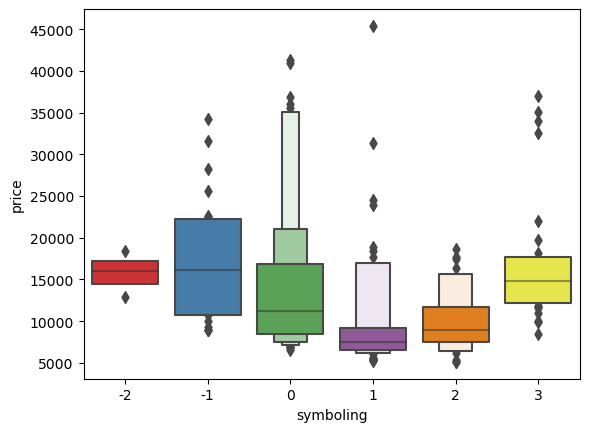

In [14]:
sns.boxenplot(x=df['symboling'] , y = df['price'],palette="Set1")
plt.show()

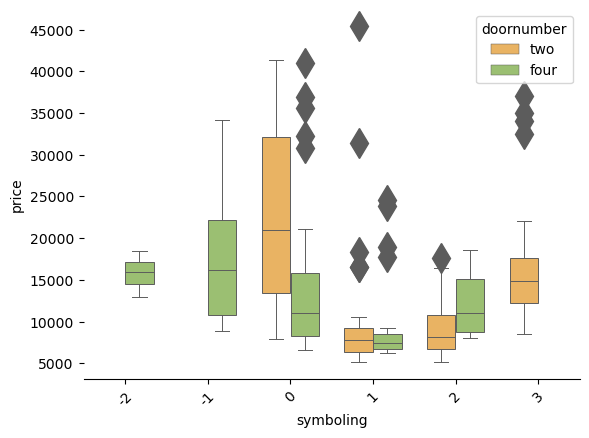

In [15]:
sns.boxplot(x=df['symboling'] , y = df['price'],hue=df['doornumber'],
            palette= {"two":'#FFB74D' , "four":'#9CCC65'},linewidth=.7,fliersize=15,width=.7)
sns.despine(left=True)
plt.xticks(rotation=45)
plt.show()

In [16]:
df.drop(['car_ID','CarName'],inplace=True,axis=1)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


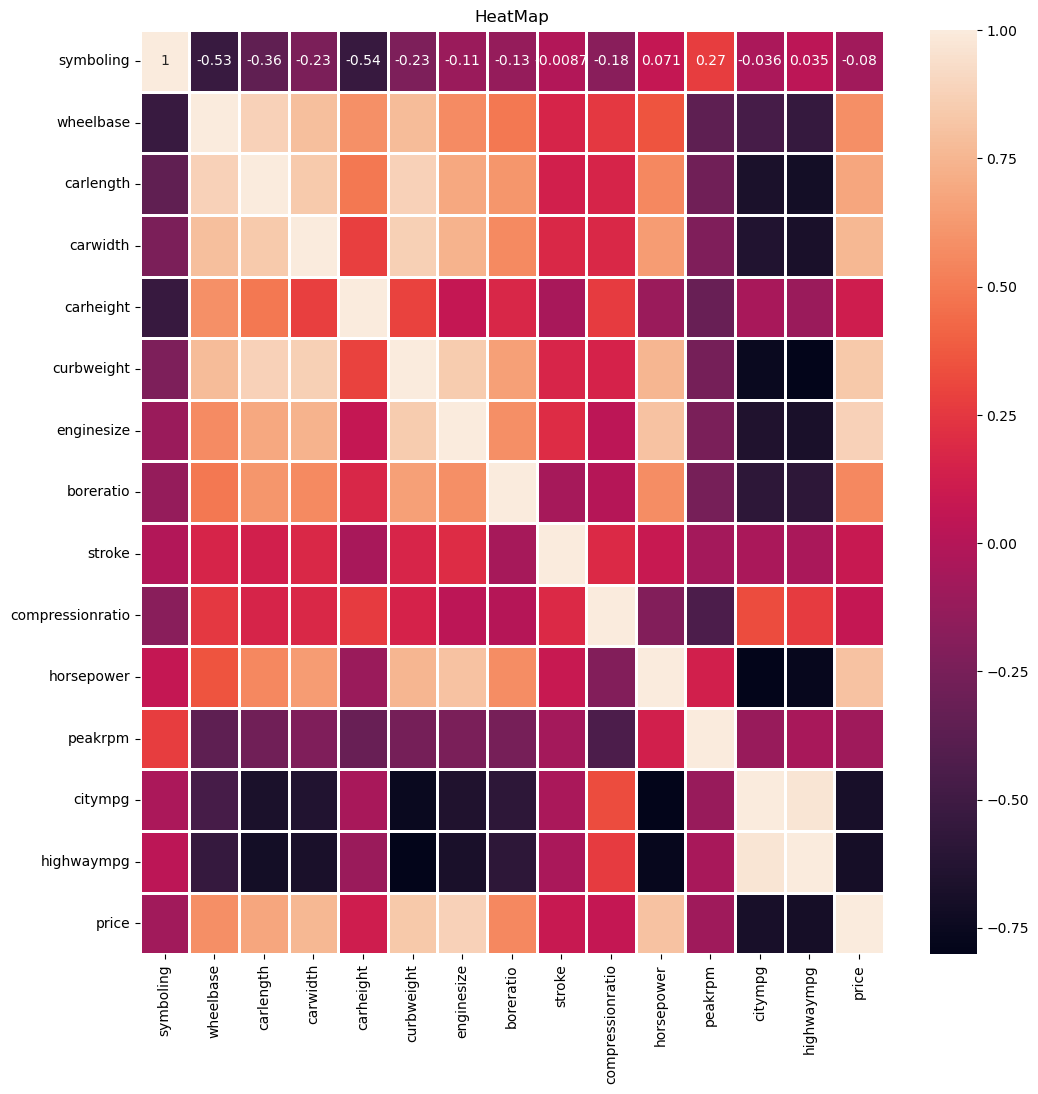

In [17]:
numric_df = df.select_dtypes(include='number')
corr_matrix=numric_df.corr()
plt.figure(figsize=(12,12))
heatmap =sns.heatmap(corr_matrix,linewidth=1,annot=True)
plt.title( "HeatMap" )
plt.show()

In [18]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    Label_encoder=preprocessing.LabelEncoder()
    df[c1]=Label_encoder.fit_transform(df[c1])
    df[c1].unique()

In [19]:
LABEL_ENCODING("fueltype")
LABEL_ENCODING("aspiration")
LABEL_ENCODING("doornumber")
LABEL_ENCODING("carbody")
LABEL_ENCODING("drivewheel")
LABEL_ENCODING("enginelocation")
LABEL_ENCODING("enginetype")
LABEL_ENCODING("cylindernumber")
LABEL_ENCODING("fuelsystem")

In [20]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [21]:
Scaler = StandardScaler()
Scaler.fit(df.drop(['price'],axis=1))
Scaled_features=Scaler.transform(df.drop(['price'],axis=1))

In [22]:
X=Scaled_features
Y=df['price']
X=pd.DataFrame(data=X,columns=df.drop(columns=['price']).columns)

<Axes: >

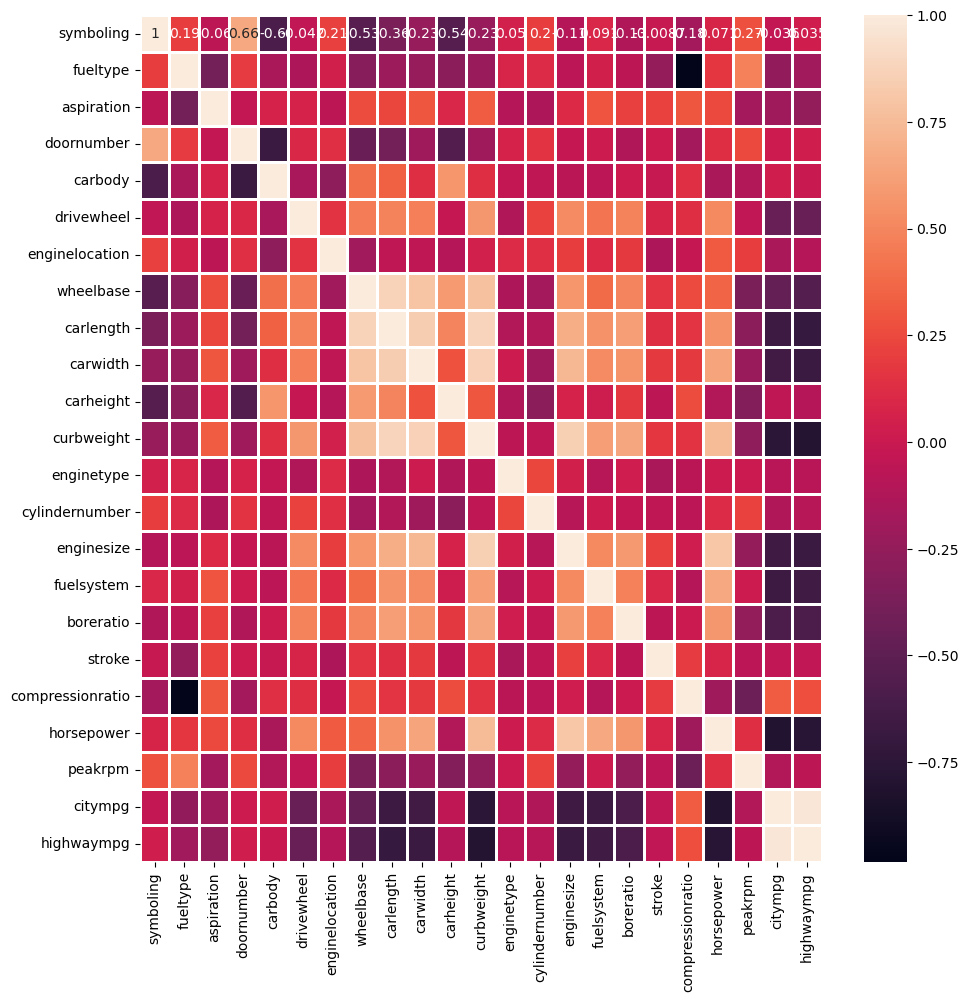

In [23]:
plt.figure(figsize=(11,11))
sns.heatmap(X.corr(),linewidth=1,annot=True)

In [24]:
vif_data=X
#calc vif for each column
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)

In [25]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)
    for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data

In [26]:
for i in range(10):
    vif_data=MC_remover(vif_data)
vif_data.head()

fueltype has been removed
citympg has been removed
curbweight has been removed
horsepower has been removed
carlength has been removed
wheelbase has been removed
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore


,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,highwaympg
0,1.743470,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-0.844782,-2.020417,-2.865105,-0.147475,0.074449,0.869568,0.519071,-1.839377,-0.288349,-0.262960,-0.546059
1,1.743470,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-0.844782,-2.020417,-2.865105,-0.147475,0.074449,0.869568,0.519071,-1.839377,-0.288349,-0.262960,-0.546059
2,0.133509,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.190566,-0.543527,1.886890,1.112210,0.604046,0.869568,-2.404880,0.685946,-0.288349,-0.262960,-0.691627
3,0.938490,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.136542,0.235942,-0.013908,-0.147475,-0.431076,0.869568,-0.517266,0.462183,-0.035973,0.787855,-0.109354
4,0.938490,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.230001,0.235942,-0.013908,-1.407161,0.218885,0.869568,-0.517266,0.462183,-0.540725,0.787855,-1.273900


In [27]:
X = vif_data
Y = df['price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=44)

In [28]:
model= RandomForestRegressor()
model.fit(X_train,Y_train)


RandomForestRegressor()

In [29]:
y_pred=model.predict(X_test)

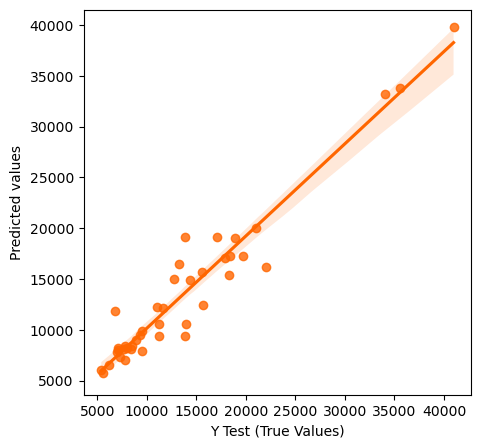

Accuracy of model 92.99298734015504


In [30]:
plt.figure(figsize=(5,5))
sns.regplot(x = Y_test,y = y_pred, color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()
accuracy=model.score(X_test,Y_test)
print("Accuracy of model",accuracy*100)

In [31]:
torch.save(model,'model.pt')